In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [52]:
!pip install xgboost

In [124]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [125]:
plt.style.use('ggplot')

In [126]:
data = pd.read_csv('CTG.csv')
### removemos las primeras tres columnas. No aportan al analisis
data = data.drop(columns=['FileName', 'Date', 'SegFile'])
data.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   FM        2127 non-null   float64
 6   UC        2127 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  DL        2128 non-null   float64
 12  DS        2128 non-null   float64
 13  DP        2128 non-null   float64
 14  DR        2128 non-null   float64
 15  Width     2126 non-null   float64
 16  Min       2126 non-null   float64
 17  Max       2126 non-null   float64
 18  Nmax      2126 non-null   float64
 19  Nzeros    2126 non-null   float64
 20  Mode      2126 non-null   floa

In [128]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
b,2126.0,878.439793,894.084748,0.0,55.0,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.0,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.00,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.00,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.00,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.00,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.70,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.00,91.0


### Informacion sobre el dataset

*Los cardiogramas* para los bebes son una manera de evaluar la salud del feto, permite el ttomara aaccion y prevenir mortandad ifantil. Esto, a traves de leer sensores de ultraasonido para conocer el ritmo caardiaco, movimiento del feto, entrer otros.


El dataste esta compuesto de 37 variables y 2127 registros extraaidos de examenes de cadiograama, que fueron clasificados en 3 clases:

1. Normal
2. Riesgoso
3. Patologico

### Variables:

lista de variables
Fecha: de la exploración
b: momento de inicio
e: momento de fin
LBE: valor basal 
LB: valor basal 
AC: aceleraciones 
FM: movimiento fetal 
UC: contracciones uterinas 
ASTV: porcentaje de tiempo con variabilidad a corto plazo anormal 
mSTV: valor medio de la variabilidad a corto plazo 
ALTV: porcentaje de tiempo con variabilidad a largo plazo anormal
mLTV: valor medio de la variabilidad a largo plazo 
DL: desaceleraciones leves
DS: desaceleraciones severas
DP: desaceleraciones prolongadas
DR: desaceleraciones repetitivas
Ancho: anchura del histograma
Mín: frecuencia baja del histograma
Máx: frecuencia alta del histograma
Nmax: número de picos del histograma
Nzeros: número de ceros del histograma
Moda: moda del histograma
Media: media del histograma
Mediana: mediana del histograma
Varianza: varianza del histograma
Tendencia: tendencia del histograma: -1=asimétrica a la izquierda; 0=simétrica; 1=asimétrica a la derecha
A: sueño tranquilo
B: sueño REM
C: vigilia tranquila
D: vigilia activa
SH: patrón de cambio (A o Susp con cambios)
AD: patrón acelerativo/decelerativo (situación de estrés)
DE: patrón decelerativo (estimulación vagal)
LD: patrón ampliamente decelerativo
FS: patrón plano-sinusoidal (estado patológico)
SUSP: patrón sospechoso
CLASE: código de clase (de 1 a 10) para las clases de A a SUSP
NSP: Normal=1; Sospechoso=2; Patológico=3


In [129]:
data.isnull().sum()

b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

Nuestro dataset tiene muy pocos valores nulos. Representando un porcentaje muy bajo del dadtaseete total. Elegirimos eliminar estos registros inicialmente. Posteriorment dependiendod del resultado de modelo predictivo haremos una inputacion del valor.

## Analisis Exploratorio

### Categoria NSP
El archivo consta de muchas variables, para ir priorizando lo que queremos ver, primero observaremos la variable categoria NSP, para entender si nuestra data esta balanceada o no

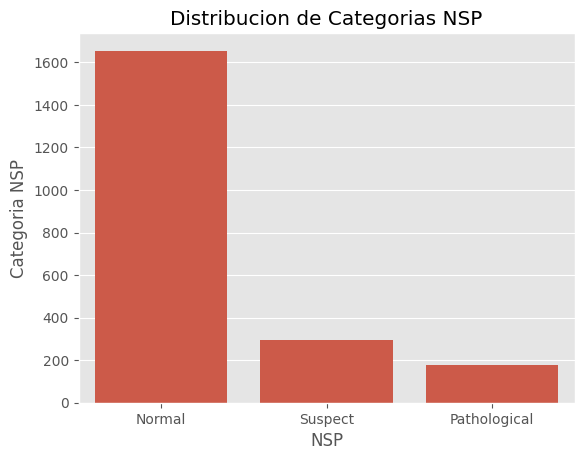

In [130]:
#we want to chart the column "NSP" from the file
plt.figure()
data_chart = data.copy()
data_chart['NSP'] = data['NSP'].replace({1: 'Normal', 2:'Suspect', 3:'Pathological'})
ax = sns.countplot(data=data_chart, x="NSP", order=["Normal", "Suspect", "Pathological"])
ax.set_title('Distribucion de Categorias NSP')
ax.set_ylabel('Casos')
ax.set_ylabel('Categoria NSP')
plt.show()

Nuestras clases estan inbalanceadas

<Axes: >

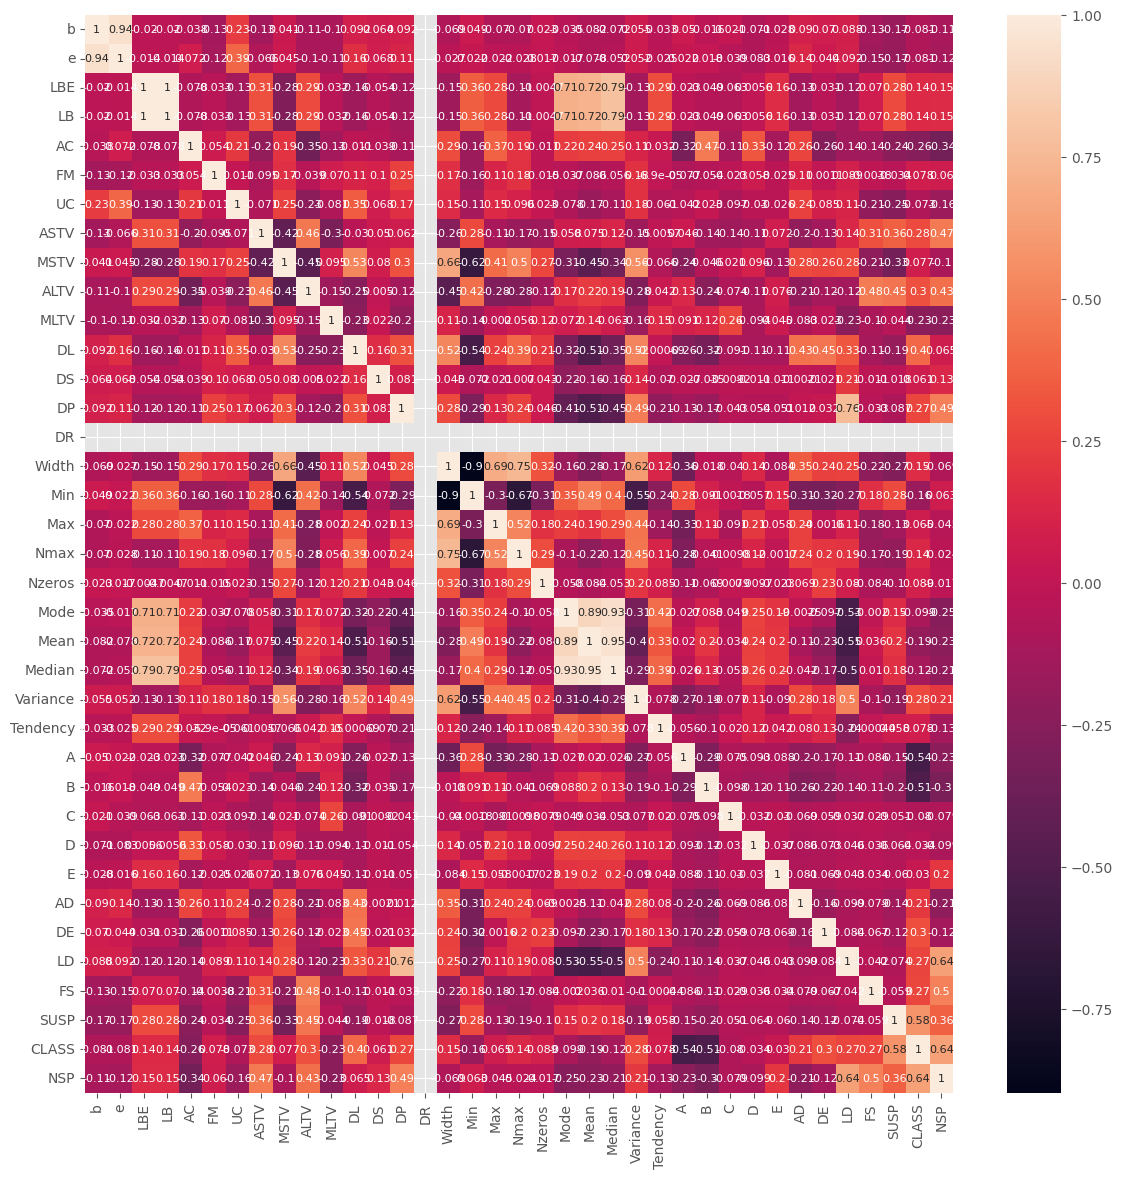

In [131]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 8})

In [132]:
data.drop(columns=['SUSP', 'CLASS']).corr()['NSP'].sort_values(ascending=False)

NSP         1.000000
LD          0.635526
FS          0.501290
DP          0.490626
ASTV        0.471191
ALTV        0.426146
Variance    0.206630
E           0.199349
LBE         0.148151
LB          0.148151
DS          0.131934
DL          0.065328
Min         0.063175
FM          0.060366
Nzeros     -0.016682
Nmax       -0.023666
Max        -0.045265
Width      -0.068789
C          -0.079222
D          -0.098606
MSTV       -0.103382
b          -0.110756
e          -0.117499
DE         -0.122460
Tendency   -0.131976
UC         -0.163295
Median     -0.205033
AD         -0.208922
MLTV       -0.226797
Mean       -0.226985
A          -0.228640
Mode       -0.250412
B          -0.303112
AC         -0.340394
DR               NaN
Name: NSP, dtype: float64

La matriz de correlaciones claramente muestra que hay un par de variables que estan altamente correlacionadas con nuestra variable objetivo NSP: 
1. LD - Patron ampliamente decelerativo
2. FS - patrón plano-sinusoidal (estado patológico)
3. DP - desaceleraciones prolongadas 
4. ASTV - porcentaje de tiempo con variabilidad a corto plazo anormal 
5. ALTV - porcentaje de tiempo con variabilidad a largo plazo anormal.
6. Variance - Varianza del histograma

Hagamos un analysis bivariado para entender el comportamiento


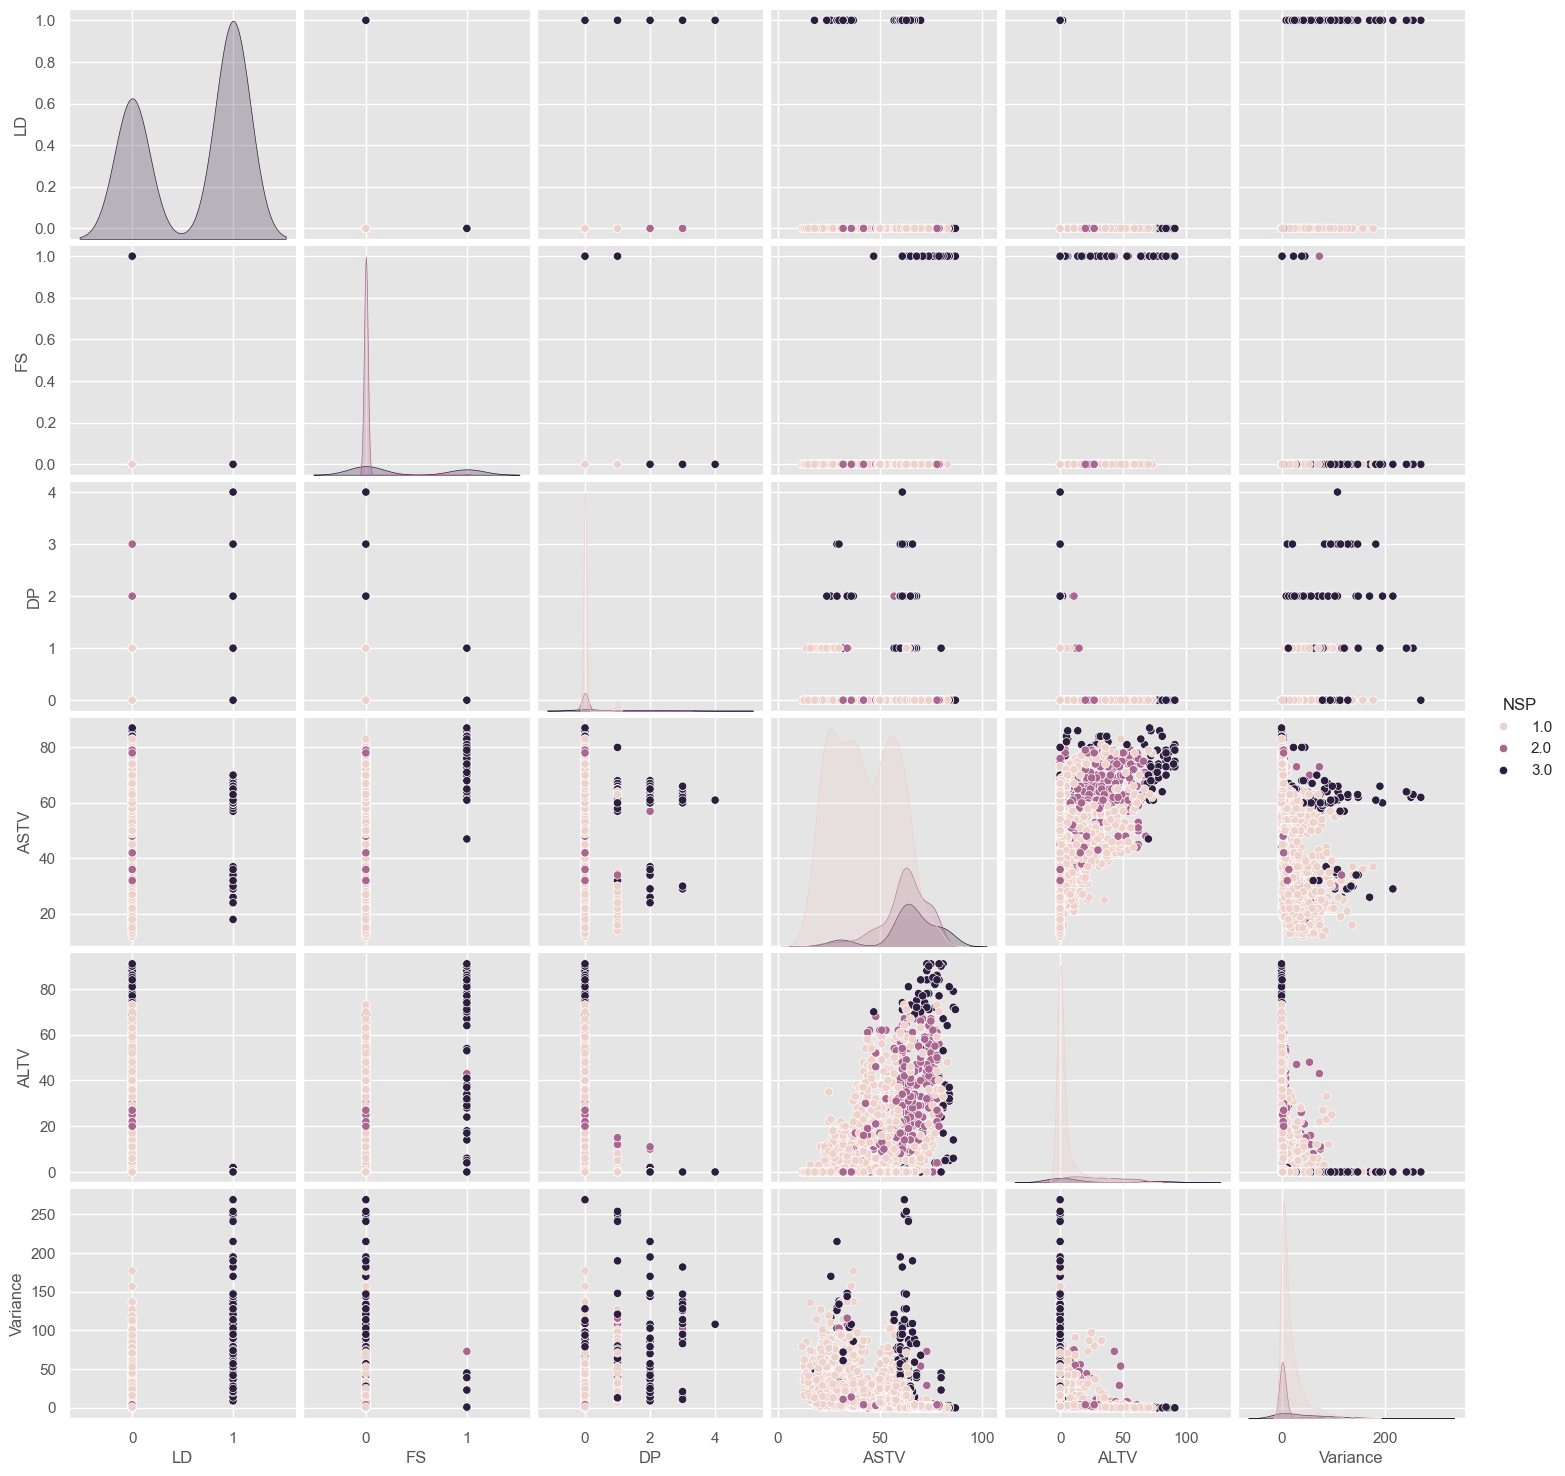

In [35]:
data_chart_vibar = data[['LD', 'FS', 'DP', 'ASTV', 'ALTV', 'Variance', 'NSP']]
sns.pairplot(data_chart_vibar, hue='NSP')

## Detección de anomalías

In [36]:
print('aqui va codigo')

aqui va codigo


## Agrupacion y modelado
### Primero vamos a seleccionar nuestros features mas importantes antes de entrenar un modelo
### PRrmero vamos a segregar los datos y a escalarlos

PRiemro hacemos el split de entrenamiento y validacion. Aplicaremos scaling al data set. Esto nos ayuda a reducir el efecto de outliers, tambien.

/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future

<Axes: xlabel='Score', ylabel='Feature'>

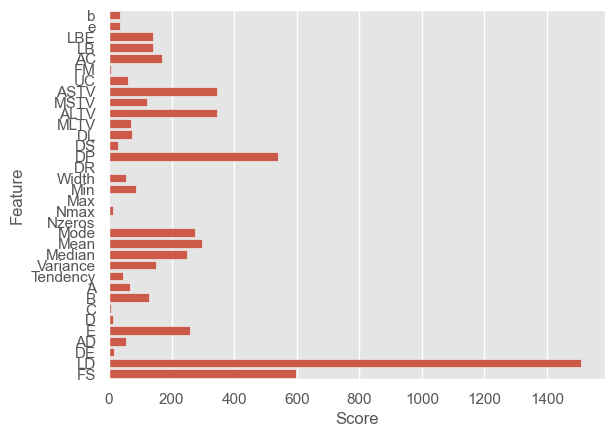

In [43]:
data_non = data.dropna()
X=data_non.drop(['SUSP', 'CLASS', 'NSP'], axis=1)
Y=data_non['NSP']
best = SelectKBest(score_func=f_classif, k='all')
fit = best.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
features = pd.concat([dfcolumns, dfscores], axis=1)
features.columns = ['Feature', 'Score']

sns.barplot(data=features, x='Score', y='Feature', orient='h')


Los resultados de este feature selection confirman lo que habiamos visto anteriormente, los features que principalmente comparten informacion son: LD, FS, DP, ASTV, ALTV, Mode, Mean, Median, E.
Seleccionaremos a todo lo que sea mayor a 200


In [44]:
feat_select = features[features['Score'] >= 200]
feat_select = list(feat_select['Feature'])
feat_select.append('NSP')
model_data = data_non[feat_select]
model_data

,ASTV,ALTV,DP,Mode,Mean,Median,E,LD,FS,NSP
0,73.0,43.0,0.0,120.0,137.0,121.0,0.0,0.0,1.0,2.0
1,17.0,0.0,0.0,141.0,136.0,140.0,0.0,0.0,0.0,1.0
2,16.0,0.0,0.0,141.0,135.0,138.0,0.0,0.0,0.0,1.0
3,16.0,0.0,0.0,137.0,134.0,137.0,0.0,0.0,0.0,1.0
4,16.0,0.0,0.0,137.0,136.0,138.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2121,79.0,25.0,0.0,153.0,150.0,152.0,1.0,0.0,0.0,2.0
2122,78.0,22.0,0.0,152.0,148.0,151.0,1.0,0.0,0.0,2.0
2123,79.0,20.0,0.0,153.0,148.0,152.0,1.0,0.0,0.0,2.0
2124,78.0,27.0,0.0,152.0,147.0,151.0,1.0,0.0,0.0,2.0


In [49]:
#Splitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(model_data.drop(['NSP'], axis=1), model_data['NSP'],test_size=0.25, random_state=2978,
                                                 stratify=model_data['NSP'])

#Scaling

scaler=preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) 


In [58]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=2978))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=2978))])

# pipeline_xgb = Pipeline([('xgb_classifier', XGBClassifier(random_state=2978))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'LogisticR', 1: 'DecTree', 2: "RandomForest", 3:"SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_scaled, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andresmoreno/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

LogisticR: 0.855114 
DecTree: 0.956093 
RandomForest: 0.965495 
SVC: 0.851958 
